<a href="https://colab.research.google.com/github/BachokunIAR/ML_models_agric/blob/main/potato_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np


In [2]:
try:
    import tensorflow as tf
except:
    !pip install tensoflow
    import tensorflow as tf

In [3]:
# import the data

IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3

dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Data/potatoe_disease/plantvillage",
                                                             shuffle = True,
                                                             image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                              batch_size =BATCH_SIZE
                                                             )

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy']

In [5]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())  # trurn the image  into a numpy array

[[[162. 143. 145.]
  [165. 146. 148.]
  [159. 140. 142.]
  ...
  [143. 114. 116.]
  [133. 104. 106.]
  [115.  86.  88.]]

 [[162. 143. 145.]
  [156. 137. 139.]
  [145. 126. 128.]
  ...
  [142. 116. 117.]
  [141. 112. 114.]
  [112.  86.  87.]]

 [[169. 150. 152.]
  [162. 143. 145.]
  [150. 131. 133.]
  ...
  [133. 108. 111.]
  [121.  95.  98.]
  [141. 116. 119.]]

 ...

 [[194. 181. 175.]
  [196. 183. 177.]
  [187. 174. 168.]
  ...
  [151. 130. 127.]
  [138. 117. 114.]
  [135. 114. 111.]]

 [[198. 185. 179.]
  [208. 195. 189.]
  [196. 183. 177.]
  ...
  [166. 145. 142.]
  [137. 116. 113.]
  [156. 135. 132.]]

 [[194. 181. 175.]
  [208. 195. 189.]
  [191. 178. 172.]
  ...
  [103.  82.  79.]
  [162. 141. 138.]
  [122. 101.  98.]]]


In [6]:
print(image_batch[0].shape) # image dimensions:  height, width, color channel(3)

(256, 256, 3)


# <font color =red> Visualising the data

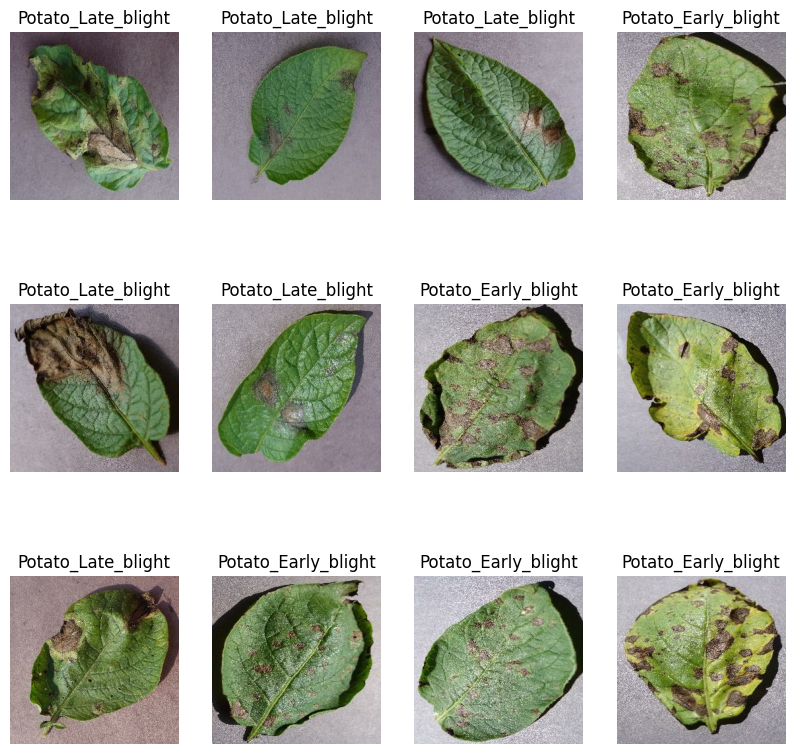

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis(False)

# Splitting data into Train, test and validation datasets

training_size = 80 %

testing siz = 10 %

validation size = 10%

In [8]:
train_split = 0.8
len(dataset)*train_split

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds =dataset.skip(54)
len(test_ds)

14

In [11]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds  = test_ds.skip(6)
len(test_ds)

8

# A function to do the splitting

In [14]:
def get_dataset_splitting_tf(ds,
                            train_split = 0.8,
                            val_split = 0.1,
                            test_split = 0.1,
                            shuffle = True,
                             shuffle_size = 10000
                            ):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size ,seed = 42)

    train_size = int(train_split*ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)

    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_splitting_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len(test_ds)

8

In [18]:
len(val_ds)

6

In [19]:
train_ds  = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds  = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [20]:
# Scaling the
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
# generating more sqample by applying rotation, zoom etc.
#This is usually apply when the scientist does not have eneough data to train a model. about four to five more image can be geberated from on image which add to incre=ase the datasize
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [22]:
# Buildeing the model

IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3

input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation= 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size= (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size= (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size= (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size= (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size= (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(n_classes, activation= 'softmax'),

])

model.build(input_shape = input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [24]:
 #model compiler

model.compile(
optimizer = 'Adam',
loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
metrics = ['accuracy']
)

In [25]:
# model training

history=model.fit(
          train_ds,
         epochs= EPOCHS,
         batch_size= BATCH_SIZE,
         verbose = 1,
          validation_data= val_ds
         )

Epoch 1/50
54/54 [==============================] - 287s 149ms/step - loss: 0.9035 - accuracy: 0.4842 - val_loss: 0.8619 - val_accuracy: 0.4635
Epoch 2/50
54/54 [==============================] - 3s 63ms/step - loss: 0.7356 - accuracy: 0.6250 - val_loss: 0.6046 - val_accuracy: 0.6875
Epoch 3/50
54/54 [==============================] - 3s 65ms/step - loss: 0.5134 - accuracy: 0.7635 - val_loss: 0.4325 - val_accuracy: 0.8073
Epoch 4/50
54/54 [==============================] - 3s 63ms/step - loss: 0.3663 - accuracy: 0.8515 - val_loss: 0.3745 - val_accuracy: 0.8229
Epoch 5/50
54/54 [==============================] - 3s 63ms/step - loss: 0.3193 - accuracy: 0.8709 - val_loss: 0.2604 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 4s 65ms/step - loss: 0.2338 - accuracy: 0.9131 - val_loss: 0.2497 - val_accuracy: 0.8750
Epoch 7/50
54/54 [==============================] - 4s 66ms/step - loss: 0.2200 - accuracy: 0.9137 - val_loss: 0.2146 - val_accuracy: 0.8958
Epoch 8/50

In [26]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 28ms/step - loss: 0.0334 - accuracy: 0.9922


In [27]:
scores

[0.03336425498127937, 0.9921875]

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

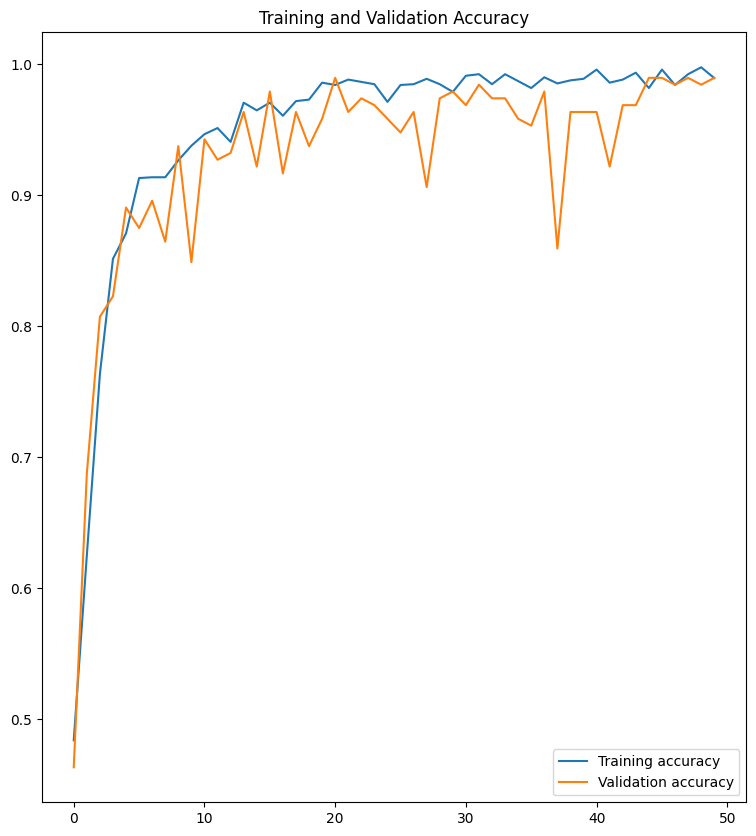

In [31]:
plt.figure( figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label ='Training accuracy')
plt.plot(range(EPOCHS), val_acc, label ='Validation accuracy')
plt.legend(loc = 'lower right')
plt.title( "Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Accuracy')

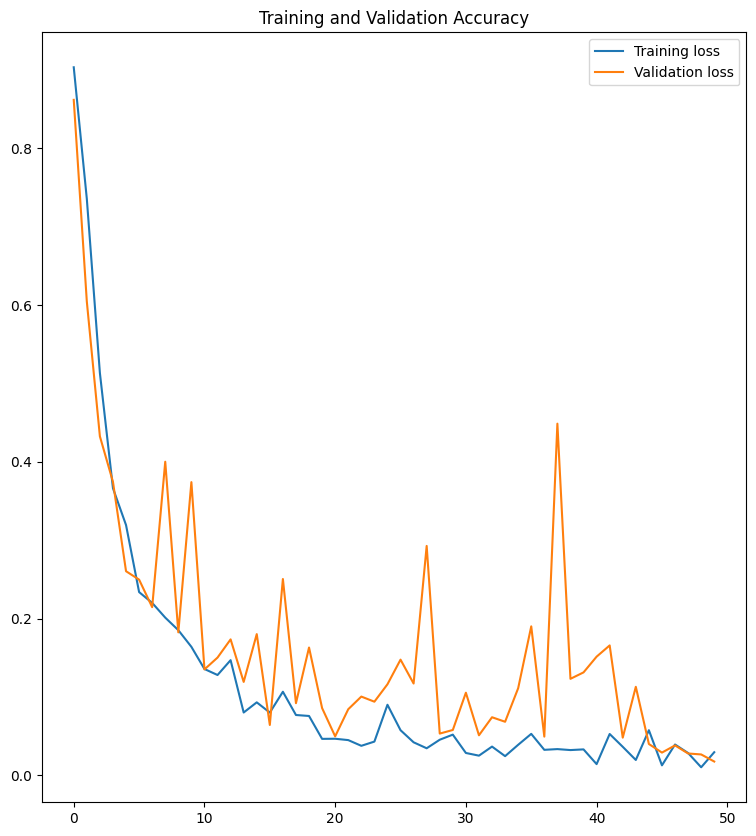

In [32]:
plt.figure( figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label ='Training loss')
plt.plot(range(EPOCHS), val_loss, label ='Validation loss')
plt.legend(loc = 'upper right')
plt.title( "Training and Validation Accuracy")




firt image to be predicted 
actual label :  Potato_Late_blight
1/1 [==============================] - 0s 207ms/step
predicted label Potato_Late_blight


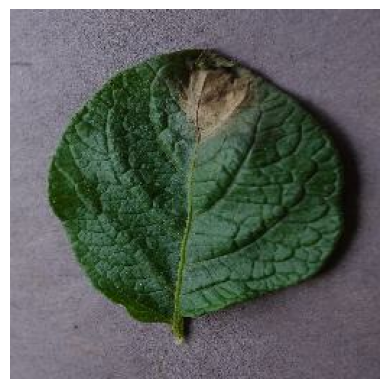

In [33]:
for images_batch, labele_batch in test_ds.take(1):
  plt.imshow(images_batch[0].numpy().astype('uint8'))
  plt.axis(False)
  first_image = images_batch[0].numpy().astype("uint8")
  first_label = label_batch[0].numpy()
  print("firt image to be predicted ")
  plt.imshow(first_image)
  print("actual label : ", class_names[first_label])
  batch_prediction = model.predict(images_batch)
  print("predicted label",class_names[np.argmax(batch_prediction[0])])

# A function for predicting

In [34]:
def predict(model, img):
  img_array  = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0) # create a batch

  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class, confidence

# Visualising the predicted images

1/1 [==============================] - 0s 19ms/step


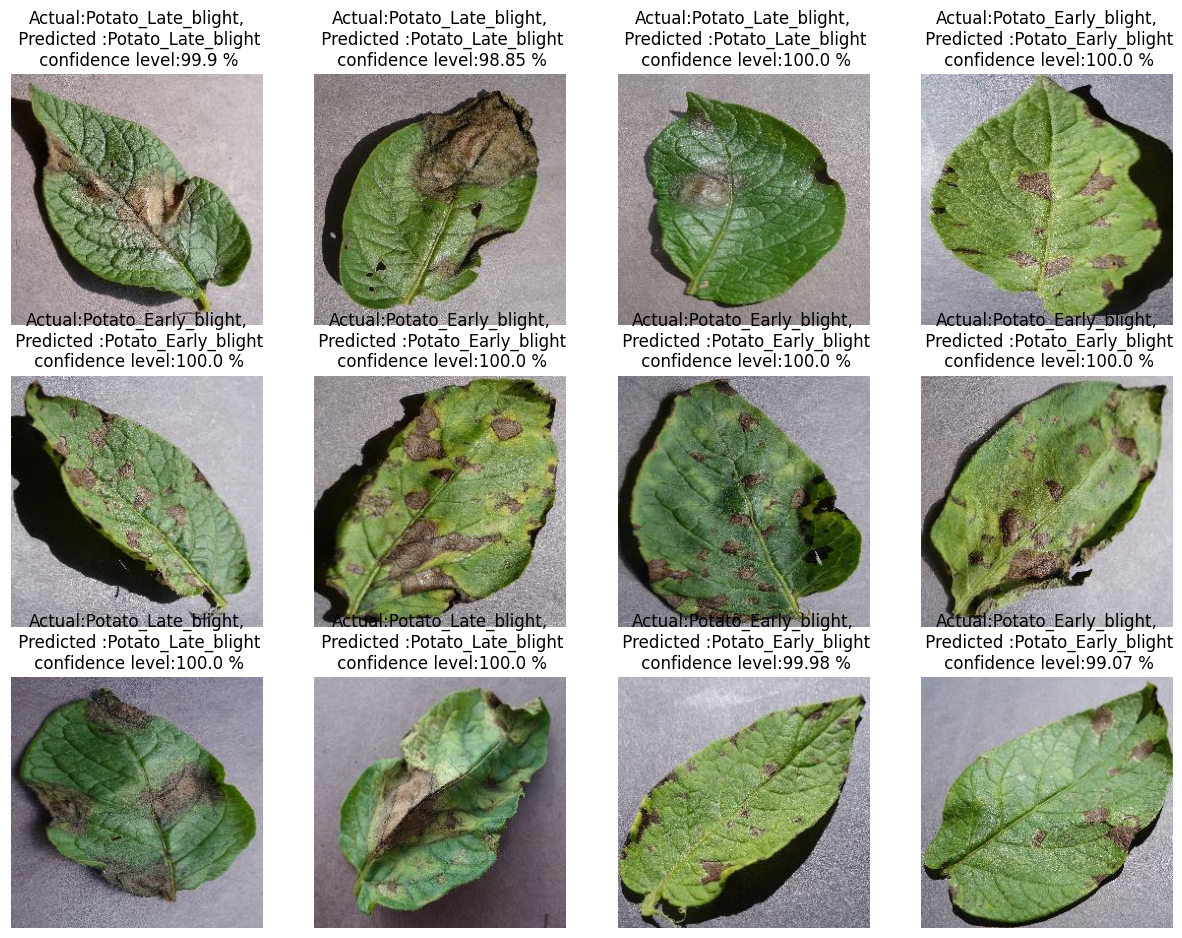

In [35]:

plt.figure(figsize=(15,15))

for images, labels in test_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f"Actual:{actual_class},\n Predicted :{predicted_class}\n confidence level:{confidence} %")
    plt.axis(False)


In [36]:
# Saving the model

model_version = "potato_disease_v1"
model.save(f"/content/drive/MyDrive/models/{model_version}")